In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

take a look at the data 

In [24]:
import pandas as pd

In [25]:
pd.read_csv("./height_weight_genders.csv")

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [26]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [27]:
y.shape, tx.shape

((10000,), (10000, 2))

In [28]:
y

array([109.81967768,  73.68895452,  96.58434842, ...,  58.32779473,
        74.38901745,  51.59669261])

The first Column represent `X0` feature that fill with ones.

In [29]:
tx


array([[ 1.        ,  1.94406149],
       [ 1.        ,  0.62753668],
       [ 1.        ,  2.01244346],
       ...,
       [ 1.        , -0.64968792],
       [ 1.        ,  0.69312469],
       [ 1.        , -1.14970831]])

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [30]:
def compute_loss(y, tx, w):
    """
    Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    e = y - tx.dot(w)
    cost = 1/2*np.mean(e**2)
    return cost
    # ***************************************************
    raise NotImplementedError

In [31]:
def calculate_mse(e):
    return 1/2*np.mean(e**2)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [32]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i in range (0, len(w0)):
        for j in range (0, len(w1)):
            w = np.array([w0[i],w1[j]])
            losses[i, j] = compute_loss(y, tx, w)
            
    # ***************************************************
    #raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.361 seconds


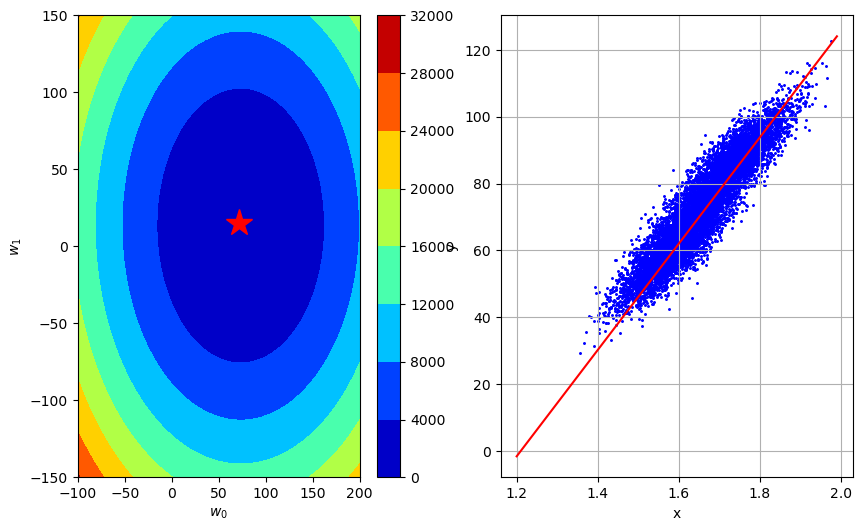

In [33]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=31.05802662144846, w0*=73.68421052631578, w1*=7.89473684210526, execution time=0.063 seconds


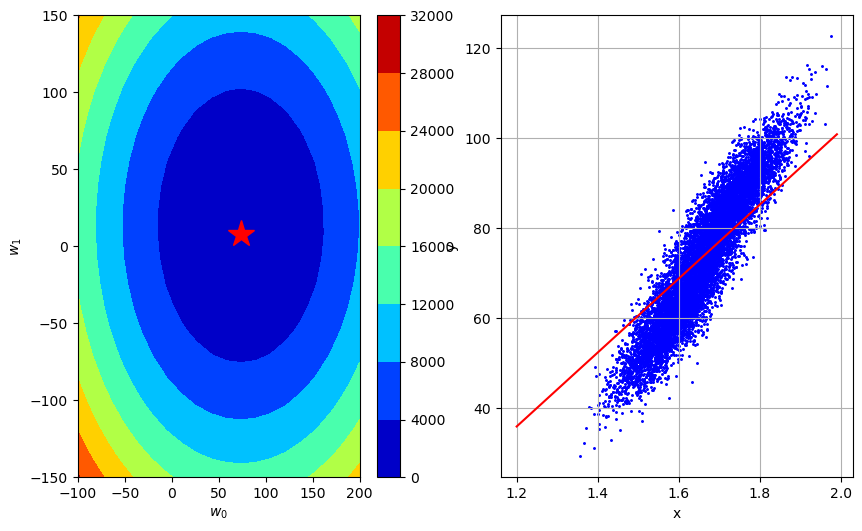

In [34]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=20)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [35]:
w = np.asarray([1,2])
tx.dot(w) , tx.shape , w.shape

(array([ 4.88812299,  2.25507336,  5.02488691, ..., -0.29937583,
         2.38624937, -1.29941662]),
 (10000, 2),
 (2,))

In [36]:
w = np.expand_dims(w , axis=1)
tx.dot(w) , tx.shape , w.shape

(array([[ 4.88812299],
        [ 2.25507336],
        [ 5.02488691],
        ...,
        [-0.29937583],
        [ 2.38624937],
        [-1.29941662]]),
 (10000, 2),
 (2, 1))

In [37]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    e = y - tx.dot(w)
    grad = (-1 * (tx.T.dot(e))) / len(tx)
    return grad ,e

In [38]:
compute_gradient(y,tx,[2,1])

(array([-71.293922  , -12.47971243]),
 array([105.87561619,  71.06141785,  92.57190497, ...,  56.97748264,
         71.69589277,  50.74640093]))

In [39]:
compute_gradient(y,tx,[10,50])

(array([-63.293922  ,  36.52028757]),
 array([  2.61660302,  32.3121206 , -14.03782444, ...,  80.81219056,
         29.73278316,  99.08210817]))

Please fill in the functions `gradient_descent` below:

In [46]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        w = w - gamma * grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [47]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.random.randint(-10,50,(2,))
print(w_initial.shape)
# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

(2,)
Gradient Descent(0/49): loss=1143.9599168746308, w0=59.105745401473634, w1=14.83579870449229
Gradient Descent(1/49): loss=116.95755047935143, w0=69.03746902191573, w1=13.886538315840008
Gradient Descent(2/49): loss=24.52733750377637, w0=72.01698610804834, w1=13.601760199244334
Gradient Descent(3/49): loss=16.208618335974634, w0=72.91084123388814, w1=13.516326764265633
Gradient Descent(4/49): loss=15.45993361087247, w0=73.17899777164007, w1=13.490696733772024
Gradient Descent(5/49): loss=15.392551985613277, w0=73.25944473296565, w1=13.483007724623942
Gradient Descent(6/49): loss=15.386487639339949, w0=73.28357882136332, w1=13.480701021879517
Gradient Descent(7/49): loss=15.38594184817535, w0=73.29081904788264, w1=13.48000901105619
Gradient Descent(8/49): loss=15.385892726970537, w0=73.29299111583842, w1=13.479801407809191
Gradient Descent(9/49): loss=15.385888306062101, w0=73.29364273622515, w1=13.479739126835092
Gradient Descent(10/49): loss=15.385887908180344, w0=73.2938382223411

In [48]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [63]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - tx.dot(w)
    grad = (-1 * (tx.T.dot(e))) / len(tx)
    return grad , e

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    ws = [initial_w]
    losses = []
    w = initial_w 
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1000):
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            w = w - gamma * grad
            loss = compute_loss(y, tx, w)
            ws.append(w)
            losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [64]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.random.randint(-10,10,(2,))

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=1376.102095715475, w0=53.894708948818376, w1=61.90597543975202
SGD(1/49): loss=24.751471173594474, w0=70.72267432576186, w1=16.96107021557253
SGD(2/49): loss=169.10538189531826, w0=64.29109306826123, w1=-1.5664850660714782
SGD(3/49): loss=47.24830665908185, w0=65.4361413367525, w1=12.072544855873346
SGD(4/49): loss=193.93302691026796, w0=70.81526843873927, w1=32.21338678349021
SGD(5/49): loss=18.21761662864754, w0=74.70610736124665, w1=11.564199440759364
SGD(6/49): loss=378.34964701360474, w0=90.20888798974667, w1=34.451394387719574
SGD(7/49): loss=166.76203754937168, w0=78.46776932137578, w1=-3.1330418001749933
SGD(8/49): loss=33.148486859253424, w0=68.81708048888322, w1=9.54485690443389
SGD(9/49): loss=18.485523171580404, w0=72.42244567995365, w1=11.14737463239028
SGD(10/49): loss=27.234206615663062, w0=73.84249501873151, w1=18.316623136986433
SGD(11/49): loss=31.780360360258218, w0=78.66978755796099, w1=15.45177087941226
SGD(12/49): loss=21.03981133967402, w0=69.9674

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=max_iters))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [ ]:
height, weight, gender = load_data(sub_sample = True, add_outlier = False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.figure(0)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
plt.show()

max_iters = 40
gamma = 0.1
batch_size = 1

w_initial = np.array([0, 0])

sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)

from plots import prediction

plt.figure(1)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
pred_x, pred_y = prediction(sgd_ws[-1][0], sgd_ws[-1][1], mean_x, std_x)
plt.plot(pred_x, pred_y, 'r')

height, weight, gender = load_data(sub_sample = True, add_outlier = True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.figure(2)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
plt.show()

sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)

plt.figure(3)
plt.scatter(height, weight, marker = ".", color = 'b', s = 5)
pred_x, pred_y = prediction(sgd_ws[-1][0], sgd_ws[-1][1], mean_x, std_x)
plt.plot(pred_x, pred_y, 'r')

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [ ]:
np.sign(y - tx.dot(w))

In [68]:

def compute_loss_mae(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    e = np.abs(y - tx.dot(w))
    cost = np.mean(e)
    return cost

In [73]:
def compute_stoch_gradient2(y, tx, w):
    e = y - tx.dot(w)
    gradient = -tx.T.dot(e) / len(e)
    return gradient , e


def stochastic_gradient_descent2(
        y, tx, initial_w, batch_size, max_iters, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w 
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            grad , e = compute_stoch_gradient2(y_batch, tx_batch, w)
            w = w - gamma * grad
            loss = compute_loss(y, tx, w)
            ws.append(w)
            losses.append(loss)
        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [74]:
max_iters = 100
gamma = 0.7
batch_size = 1

w_initial = np.array([0, 0])

start_time = datetime.datetime.now()
sgd_losses2, sgd_ws2 = stochastic_gradient_descent2(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/99): loss=1914.7772117317463, w0=58.35992879663772, w1=73.27735866512826
SGD(1/99): loss=1598.1902695498363, w0=21.084583246133136, w1=34.45097157759099
SGD(2/99): loss=1650.253769101321, w0=44.36286312884208, w1=62.80242114950272
SGD(3/99): loss=1596.3112259309412, w0=34.065181555646966, w1=53.76564793497008
SGD(4/99): loss=445.8777425892244, w0=69.84333193669207, w1=42.61864065208828
SGD(5/99): loss=333.02196385027236, w0=77.26074931337499, w1=38.37020124186968
SGD(6/99): loss=302.39202692291246, w0=50.58690234013461, w1=5.8374918035856425
SGD(7/99): loss=268.50806159841085, w0=59.61812822160893, w1=-4.386932799427601
SGD(8/99): loss=287.31481896744157, w0=69.98272558134352, w1=-9.604781071699797
SGD(9/99): loss=142.57182091480502, w0=88.74225974936435, w1=17.4446496272481
SGD(10/99): loss=51.43564773472431, w0=78.25354596424505, w1=6.587568364675526
SGD(11/99): loss=59.779603589366026, w0=80.95621718440012, w1=7.995492893390346
SGD(12/99): loss=17.18419628107992, w0=72.4851006

In [75]:
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses2, sgd_ws2, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>